In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [4]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

In [6]:
#1 Frequency table for the pproduct categories
frequency_table_category=df['category'].value_counts()
display(frequency_table_category)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [7]:
#Top 5 category listings
display(frequency_table_category.head(5))

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

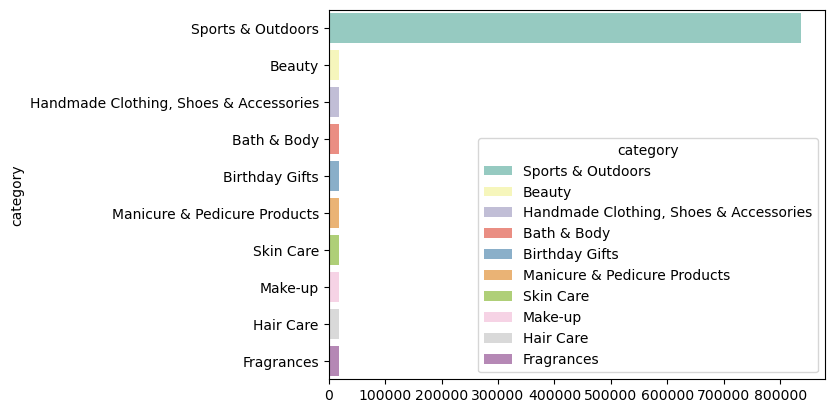

In [8]:
#2 Visualizations
#bar plt fr first 10 categories
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
ax=sns.barplot(y=frequency_table_category.head(10).index, x=frequency_table_category.head(10).values, palette="Set3", hue=frequency_table_category.head(10).index, legend='full')
sns.move_legend(ax, "lower right")
plt.show()

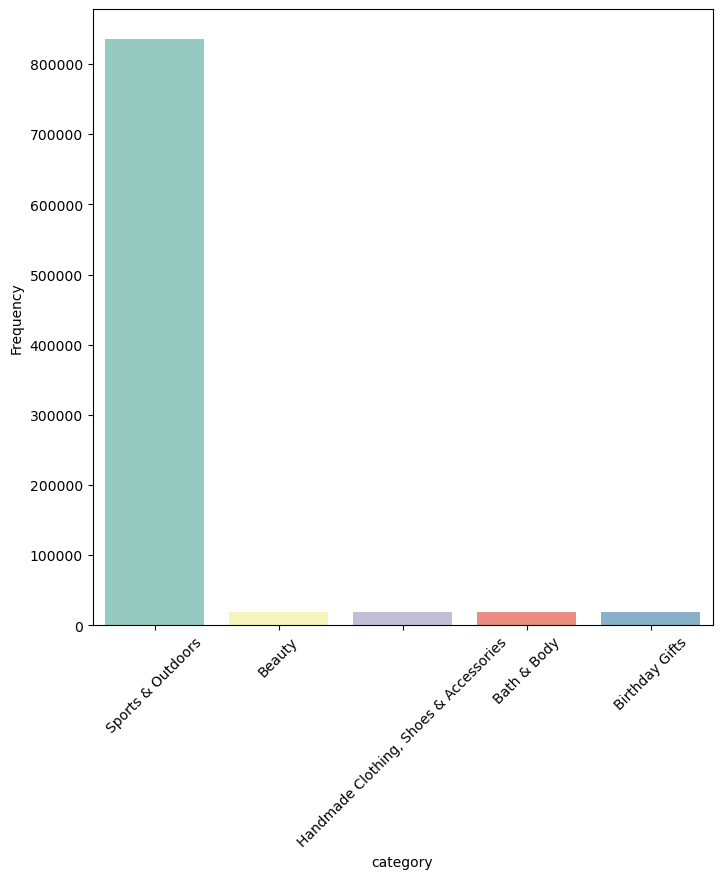

In [9]:
# Plotting a bar chart using the 'count' values from 'my_table', with colors sourced from the "Set3" palette
fig, axes = plt.subplots(figsize=(8,8)) 
sns.barplot(x=frequency_table_category.head(5).index, y=frequency_table_category.head(5).values, palette="Set3",hue=frequency_table_category.head(5).index, legend=False
            ,ax=axes)
axes.set_ylabel("Frequency")
axes.set_xlabel("category")
plt.xticks(rotation=45)
plt.show()

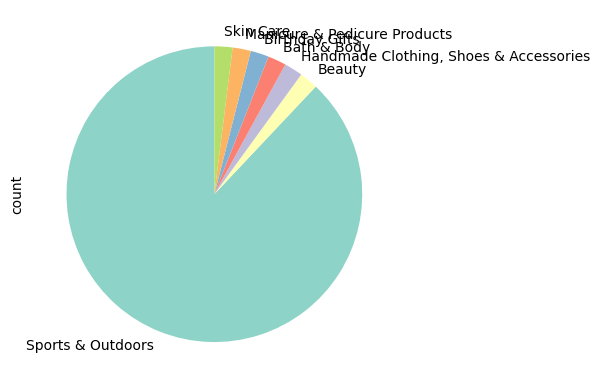

In [10]:
#create pie chart for 1st 10 categories
#df['category'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));
df['category'].value_counts().head(7).plot.pie(autopct=None, startangle=90, colors=sns.color_palette("Set3"));

plt.show()

In [11]:
proportion_table = df['category'].value_counts(normalize=True)
percentage_formatted = proportion_table.mul(100).round(2).astype(str) + '%'
print(percentage_formatted)

category
Sports & Outdoors                         34.22%
Beauty                                     0.79%
Handmade Clothing, Shoes & Accessories     0.79%
Bath & Body                                0.78%
Birthday Gifts                             0.78%
                                           ...  
Alexa Built-In Devices                      0.0%
Motorbike Chassis                           0.0%
Plugs                                       0.0%
Smart Home Security & Lighting              0.0%
Smart Speakers                              0.0%
Name: proportion, Length: 296, dtype: object


### The 'Sports & Outdoor' category dominates all other categories by 34 % out of 296 categories. Other following categories are : Beauty , Handmade Clothing ,Shoe and Accesory , Baath & Body .

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

In [14]:
df.groupby('category')['price'].mean()  # Average price per category


category
3D Printers                       1018.036129
3D Printing & Scanning              99.909599
Abrasive & Finishing Products       15.801760
Action Cameras                     135.418598
Adapters                             8.750197
                                     ...     
Wind Instruments                   391.590480
Window Treatments                   20.668326
Women                               22.262394
Women's Sports & Outdoor Shoes      73.332266
eBook Readers & Accessories         55.140325
Name: price, Length: 296, dtype: float64

In [15]:
df.groupby('category')['price'].median() 

category
3D Printers                       319.00
3D Printing & Scanning             36.86
Abrasive & Finishing Products      10.49
Action Cameras                     60.77
Adapters                            7.05
                                   ...  
Wind Instruments                  126.79
Window Treatments                  17.99
Women                              16.49
Women's Sports & Outdoor Shoes     61.64
eBook Readers & Accessories        23.00
Name: price, Length: 296, dtype: float64

In [16]:
df.groupby('category')['price'].agg(pd.Series.mode)

category
3D Printers                        499.0
3D Printing & Scanning            313.99
Abrasive & Finishing Products       5.99
Action Cameras                     16.99
Adapters                            7.99
                                   ...  
Wind Instruments                    9.99
Window Treatments                  18.99
Women                               9.99
Women's Sports & Outdoor Shoes     29.99
eBook Readers & Accessories        21.99
Name: price, Length: 296, dtype: object

In [17]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

In [18]:
df.groupby('category')['price'].max() 

category
3D Printers                       12999.00
3D Printing & Scanning             5448.93
Abrasive & Finishing Products       150.24
Action Cameras                     2499.00
Adapters                             67.18
                                    ...   
Wind Instruments                   9662.10
Window Treatments                   129.99
Women                               259.00
Women's Sports & Outdoor Shoes      363.37
eBook Readers & Accessories         519.00
Name: price, Length: 296, dtype: float64

In [19]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [20]:
# Measure of Dispersion

In [21]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])


print(f" variance price {variance_price}")
print(f" std deviation price {std_dev_price}")
print(f" min price {min_price}")
print(f" max price {max_price} ")
print(f" range {range_price} ")
print(f" quantile {quantiles_price} ")

 variance price 119445.4853225653
 std deviation price 345.6088617535223
 min price 0.0
 max price 100000.0 
 range 100000.0 
 quantile 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64 


####  Skewness and kurtosis

In [23]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(np.float64(27.492977566280338), np.float64(4241.616412866518))

#### 1. The maximum price is 100000 for some specific devices.
#### also the minimum price is 0

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define bins (edges)
bins = [0, 1000, 5000, 10000, 20000, 50000, 100000]

# Define labels (must be one less than number of bins)
labels = ["Very Low", "Low", "Medium", "High", "Very High", "Ultra High"]

# Sample data
df_price = pd.DataFrame({'Value': [500, 2000, 7000, 15000, 45000, 80000, 100000]})

# Apply binning
df_price['Category'] = pd.cut(df_price['Value'], bins=bins, labels=labels, include_lowest=True)

df_price

,Value,Category
0,500,Very Low
1,2000,Low
2,7000,Medium
3,15000,High
4,45000,Very High
5,80000,Ultra High
6,100000,Ultra High


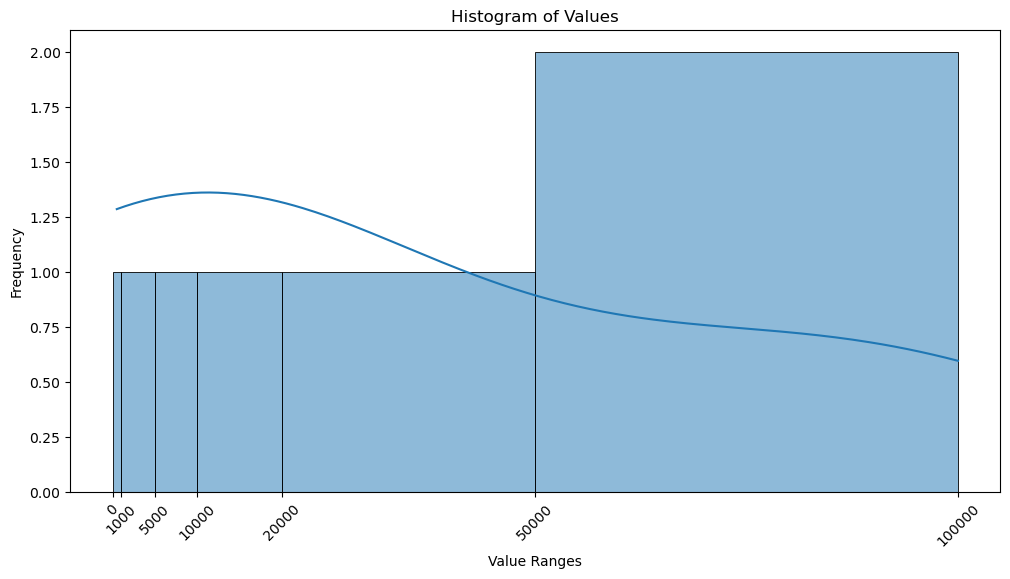

In [43]:
# Plot Histogram using Seaborn
#plt.figure(figsize=(10, 5))
plt.figure(figsize=(12, 6))
sns.histplot(df_price['Value'], bins=bins, kde=True, edgecolor='black')
#sns.histplot(df['Value'], bins=bins, edgecolor='black')

# Customizing the Plot
plt.xticks(bins, rotation=45)  # Set x-ticks to bin edges
plt.xlabel("Value Ranges")
plt.ylabel("Frequency")
plt.title("Histogram of Values")
#sns.histplot(df_price['Value'], bins=bins, stat="density", kde=True)

#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.xticks(rotation=0)

# Show the plot
plt.show()

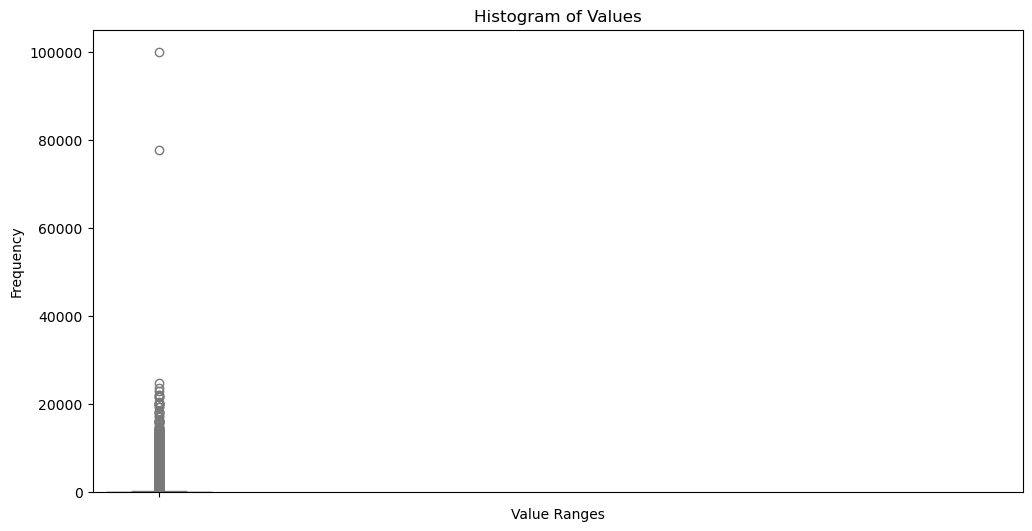

In [35]:
sns.boxplot(data = df['price'], color="lightblue")
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

In [47]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,Category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,Very Low
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers,Low
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,Medium
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,High
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers,Very High


In [49]:
df['stars'].mean()

np.float64(2.152836472966065)

In [53]:
df['stars'].mode()[0]

np.float64(0.0)

In [55]:
df['stars'].median()

0.0

In [62]:
df.groupby('category')['stars'].mean().sort_values(ascending = False)

category
Luxury Food & Drink                       4.547570
Grocery                                   4.469061
Laptop Accessories                        4.449600
Health & Personal Care                    4.439649
Arts & Crafts                             4.432663
                                            ...   
Motorbike Instruments                     0.166507
3D Printing & Scanning                    0.148267
Motorbike Handlebars, Controls & Grips    0.125466
Motorbike Electrical & Batteries          0.097857
CD, Disc & Tape Players                   0.083655
Name: stars, Length: 296, dtype: float64

In [74]:
df.groupby('category')['stars'].median()

category
3D Printers                       3.9
3D Printing & Scanning            0.0
Abrasive & Finishing Products     4.5
Action Cameras                    0.0
Adapters                          4.4
                                 ... 
Wind Instruments                  0.0
Window Treatments                 4.4
Women                             4.3
Women's Sports & Outdoor Shoes    4.3
eBook Readers & Accessories       0.0
Name: stars, Length: 296, dtype: float64

In [80]:
df.groupby('category')['stars'].apply(lambda x: x.mode().iloc[0])

category
3D Printers                       0.0
3D Printing & Scanning            0.0
Abrasive & Finishing Products     4.5
Action Cameras                    0.0
Adapters                          4.4
                                 ... 
Wind Instruments                  0.0
Window Treatments                 4.4
Women                             4.4
Women's Sports & Outdoor Shoes    4.4
eBook Readers & Accessories       0.0
Name: stars, Length: 296, dtype: float64

In [82]:
#2.Measures of Dispersion:

#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?

In [86]:
variance_review = df['stars'].var()
std_dev_review = df['stars'].std()
min_review = df['stars'].min()
max_review = df['stars'].max()
range_review = max_review - min_review
quantiles_star = df['stars'].quantile([0.25, 0.5, 0.75])


print(f" variance star {variance_review}")
print(f" std deviation star {std_dev_review}")
print(f" min star {min_review}")
print(f" max star {max_review} ")
print(f" range {range_review} ")
print(f" quantile {quantiles_star} ")

 variance star 4.81743402976196
 std deviation star 2.1948653785054697
 min star 0.0
 max star 5.0 
 range 5.0 
 quantile 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64 


## Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [93]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

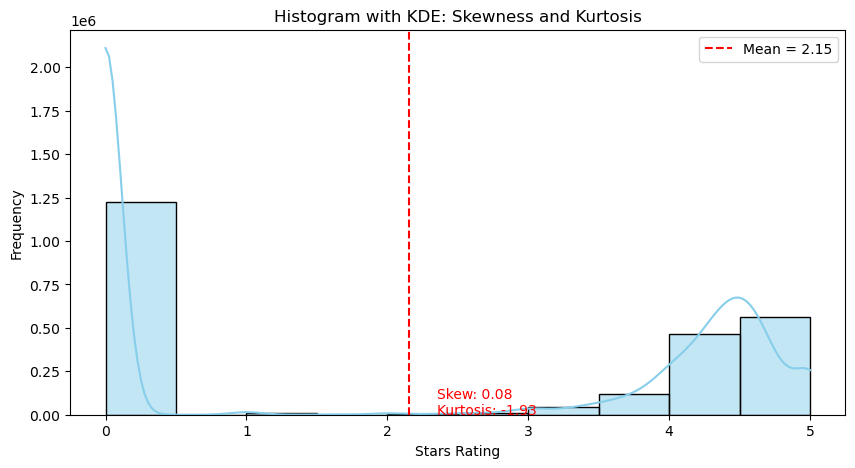

In [105]:
# Calculate Skewness and Kurtosis
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

# Plot Histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['stars'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Add skewness & kurtosis info
plt.axvline(df['stars'].mean(), color='red', linestyle='dashed', label=f'Mean = {df["stars"].mean():.2f}')
plt.text(df['stars'].mean()+0.2, 1, f'Skew: {skewness_rating:.2f}\nKurtosis: {kurtosis_rating:.2f}', color='red')

# Labels and Title
plt.xlabel("Stars Rating")
plt.ylabel("Frequency")
plt.title("Histogram with KDE: Skewness and Kurtosis")
plt.legend()

# Show the Plot
plt.show()


#### Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

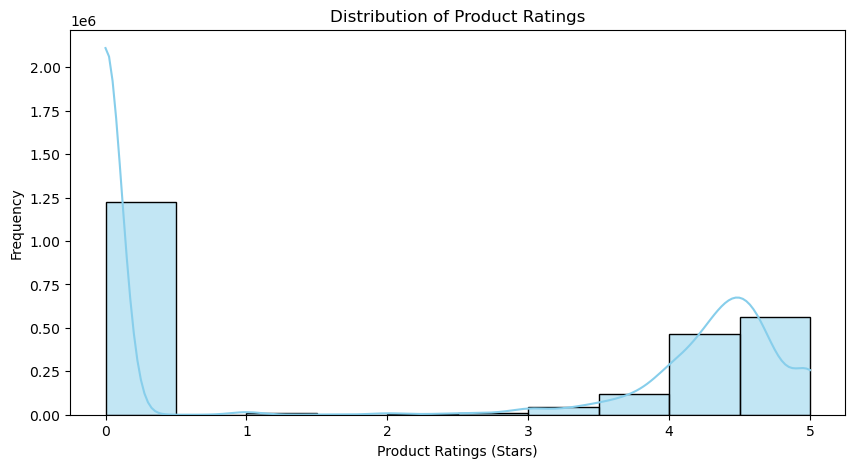

In [109]:
plt.figure(figsize=(10, 5))
sns.histplot(df['stars'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Product Ratings (Stars)")
plt.ylabel("Frequency")
plt.title("Distribution of Product Ratings")

plt.show()